In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class Norm:
    def __init__(self, mu, var) -> None:
        self.mu = mu
        self.var = var
        self.sigma = np.sqrt(var)

    def pdf(self, x):
        return (1 / np.sqrt(2 * self.var * np.pi)) * np.exp(-0.5 * np.power((x - self.mu) / self.sigma, 2))
    

In [2]:
class Parzen:
    def __init__(self, samples, kernel, h) -> None:
        self.samples = samples
        self.kernel = kernel
        self.h = h

    def estimated_pdf(self, x):
        pdf = 0
        for sample in self.samples:
            pdf +=  self.kernel((x - sample)/self.h)

        return pdf / (self.h * len(self.samples))
    

In [3]:
class Uniform:
    def __init__(self, low, high) -> None:
        self.low = low
        self.high = high

    def pdf(self, x):
        return np.where(np.logical_and(x > self.low, x < self.high),
                 1 / (self.high - self.low), 0)

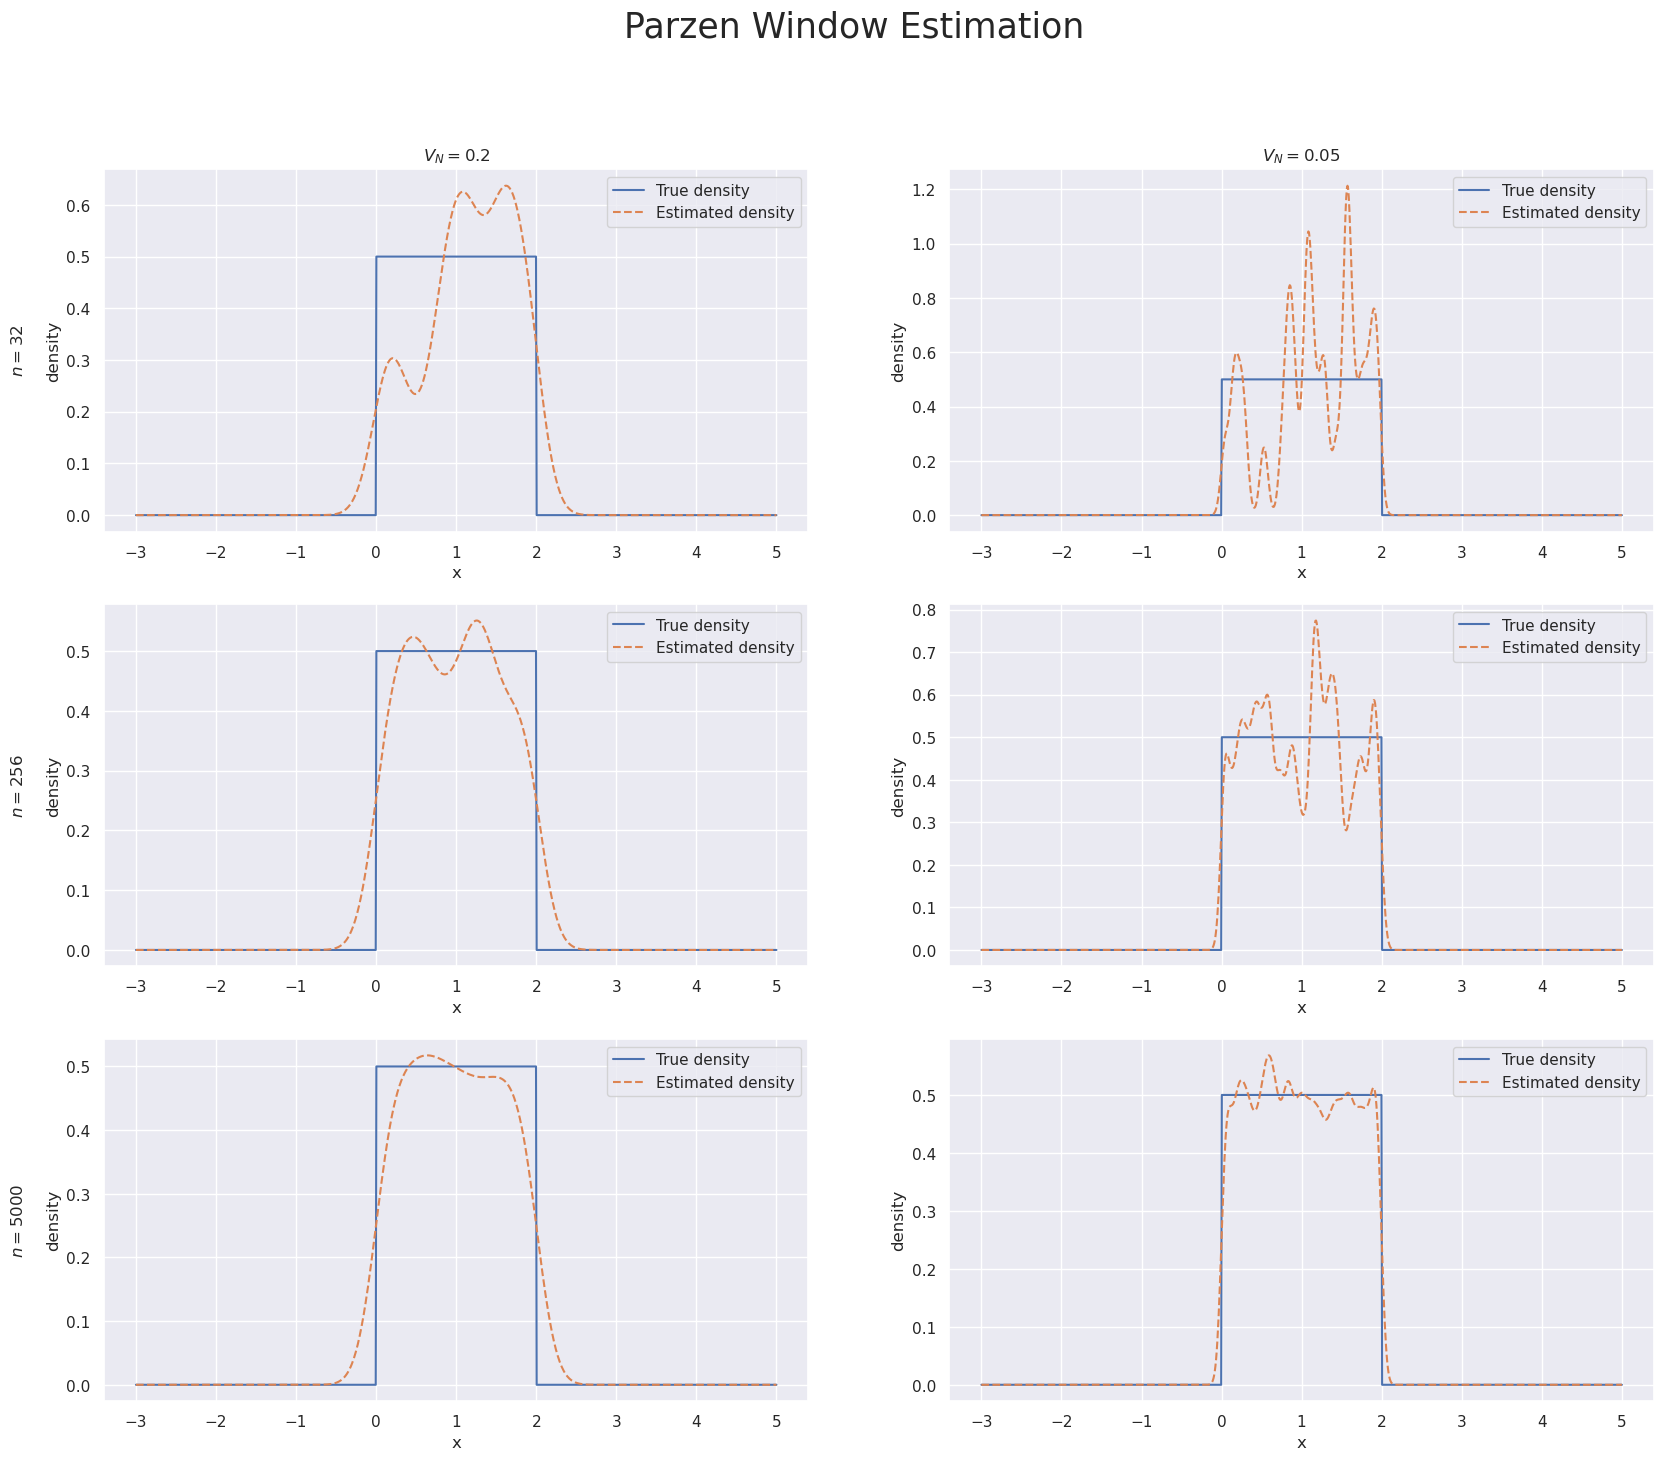

In [5]:
sns.set()
np.random.seed(0)

x_grid = np.linspace(-3, 5, 1000)

true_density = Uniform(0, 2).pdf(x_grid)

v_list = [0.2, 0.05]
num_of_samples = [32, 256, 5000]

fig, axs = plt.subplots(3, 2, figsize=(20, 16))

for i in range(len(num_of_samples)):
    samples = np.random.uniform(0, 2, num_of_samples[i])

    for j in range(len(v_list)):
        estimated_density = Parzen(samples, Norm(0, 1).pdf, v_list[j]).estimated_pdf(x_grid)

        axs[i, j].plot(x_grid, true_density, label='True density')  
        axs[i, j].plot(x_grid, estimated_density, '--', label='Estimated density')
        axs[i, j].set(xlabel='x', ylabel='density')
        axs[i, j].legend()

        if j == 0:
            axs[i, j].set_ylabel('$n = $' + str(num_of_samples[i]) + "\n\n" + "density")
        if i == 0:
            axs[i, j].set_title("$V_N = $" + str(v_list[j]))
fig.suptitle('Parzen Window Estimation', fontsize=25)
plt.savefig('../assets/Q6.png', dpi=300)
plt.show()